# 1 Loss plot

In [1]:
import torch

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print("Using device:", device)


Using device: cuda


In [4]:
import os, sys

# Add DLStudio-2.5.2 and AdversarialLearning to sys.path so Python can find DLStudio and AdversarialLearning
current_dir = os.getcwd()
print("current_dir = %s" % current_dir)

DLStudio_dir = os.path.join(current_dir, "../DLStudio-2.5.3")
sys.path.append(DLStudio_dir)
# Transformer_dir = os.path.join(current_dir, "../DLStudio-2.5.3")
# sys.path.append(Transformer_dir)

from DLStudio import *
from Transformers import *

current_dir = d:\MS Purdue\1.5\ECE60146\HW10


### 1.1 FG



Size of the English vocab in the dataset:  11258

Size of the Spanish vocab in the dataset:  21823


The number of learnable parameters in the Master Encoder: 1255424

The number of learnable parameters in the Master Decoder: 7065663



Number of sentence pairs in the dataset:  10000

No sentence is longer than 10 words (including the SOS and EOS tokens)




Maximum number of training iterations in each epoch: 200



[epoch: 1/40  iter: 200  elapsed_time:  225 secs]     loss: 1.1671

[epoch: 2/40  iter: 200  elapsed_time:  451 secs]     loss: 0.7184

[epoch: 3/40  iter: 200  elapsed_time:  677 secs]     loss: 0.6430

[epoch: 4/40  iter: 200  elapsed_time:  902 secs]     loss: 0.5797

[epoch: 5/40  iter: 200  elapsed_time: 1131 secs]     loss: 0.5149

[epoch: 6/40  iter: 200  elapsed_time: 1385 secs]     loss: 0.4518

[epoch: 7/40  iter: 200  elapsed_time: 1618 secs]     loss: 0.3922

[epoch: 8/40  iter: 200  elapsed_time: 1863 secs]     loss: 0.3363

[epoch: 9/40  iter: 200  elapsed_

d:\MS Purdue\1.5\ECE60146\HW10\../DLStudio-2.5.3\Transformers\Transformers.py:1073: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  master_encoder.load_state_dict(torch.load(s




The input sentence pair:  ['SOS sri lanka is a beautiful island EOS'] ['SOS sri lanka es una hermosa isla EOS']

The translation produced by TransformerFG:  EOS sri lanka es una hermosa isla EOS EOS EOS



The input sentence pair:  ['SOS do you travel a lot EOS'] ['SOS viajáis mucho EOS']

The translation produced by TransformerFG:  EOS viajáis mucho EOS EOS EOS EOS EOS EOS EOS



The input sentence pair:  ['SOS i forgot i owed you money EOS'] ['SOS olvidé que te debía dinero EOS']

The translation produced by TransformerFG:  EOS se te te debía debía EOS EOS EOS EOS



The input sentence pair:  ['SOS i guess it is true EOS'] ['SOS supongo que es verdad EOS']

The translation produced by TransformerFG:  EOS supongo que es verdad EOS EOS EOS EOS EOS



The input sentence pair:  ['SOS i meet a lot of people EOS'] ['SOS conozco a mucha gente EOS']

The translation produced by TransformerFG:  EOS conozco a mucha gente EOS EOS EOS EOS EOS



The input sentence pair:  ['SOS i can ride a ho

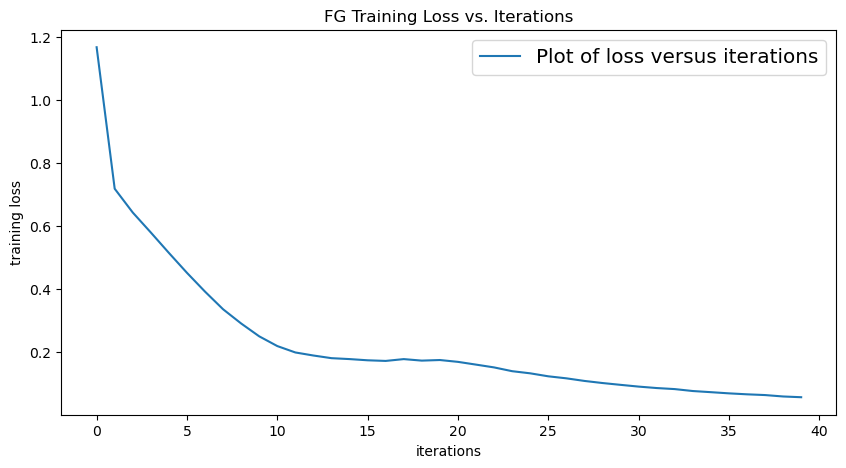

In [7]:
# this code is borrowed from DLstudio

import random
import numpy
import torch
import os, sys

seed = 0           
random.seed(seed)
torch.manual_seed(seed)
torch.cuda.manual_seed(seed)
numpy.random.seed(seed)
torch.backends.cudnn.deterministic=True
torch.backends.cudnn.benchmarks=False
os.environ['PYTHONHASHSEED'] = str(seed)


dataroot = "./../data/DataForXformer/"


data_archive =  "en_es_xformer_8_10000.tar.gz"                     ## for debugging only
# data_archive =  "en_es_xformer_8_90000.tar.gz" # this takes so long to train


max_seq_length = 10

embedding_size = 256        
#embedding_size = 128
#embedding_size = 64        

num_basic_encoders = num_basic_decoders = num_atten_heads = 4     
#num_basic_encoders = num_basic_decoders = num_atten_heads = 2    

#optimizer_params = {'beta1' : 0.9,  'beta2': 0.98,  'epsilon' : 1e-9}
optimizer_params = {'beta1' : 0.9,  'beta2': 0.98,  'epsilon' : 1e-6}

num_warmup_steps = 4000

masking = True                     ## for better results
#masking = False

dls = DLStudio(
                dataroot = dataroot,
                path_saved_model = {"encoder_FG" : "./saved_encoder_FG", 
                                    "decoder_FG" : "./saved_decoder_FG", 
                                    "embeddings_generator_en_FG" : "./saved_embeddings_generator_en_FG",
                                    "embeddings_generator_es_FG" : "./saved_embeddings_generator_es_FG",
                                   },
                batch_size = 50,
                use_gpu = True,
                epochs = 40,
              )

xformer = TransformerFG( 
                        dl_studio = dls,
                        dataroot = dataroot,
                        data_archive = data_archive,
                        max_seq_length = max_seq_length,
                        embedding_size = embedding_size,
                        save_checkpoints = True,
                        num_warmup_steps = num_warmup_steps,
                        optimizer_params = optimizer_params,
          )

master_encoder = TransformerFG.MasterEncoder(
                                  dls,
                                  xformer,
                                  num_basic_encoders = num_basic_encoders,
                                  num_atten_heads = num_atten_heads,
                 )    


master_decoder = TransformerFG.MasterDecoderWithMasking(
                                  dls,
                                  xformer, 
                                  num_basic_decoders = num_basic_decoders,
                                  num_atten_heads = num_atten_heads,
                                  masking = masking
                 )


number_of_learnable_params_in_encoder = sum(p.numel() for p in master_encoder.parameters() if p.requires_grad)
print("\n\nThe number of learnable parameters in the Master Encoder: %d" % number_of_learnable_params_in_encoder)

number_of_learnable_params_in_decoder = sum(p.numel() for p in master_decoder.parameters() if p.requires_grad)
print("\nThe number of learnable parameters in the Master Decoder: %d" % number_of_learnable_params_in_decoder)

if masking:
    xformer.run_code_for_training_TransformerFG(dls,master_encoder,master_decoder,display_train_loss=True,
                                                                                     checkpoints_dir="checkpoints_with_masking_FG")
else:
    xformer.run_code_for_training_TransformerFG(dls,master_encoder,master_decoder,display_train_loss=True,
                                                                                        checkpoints_dir="checkpoints_no_masking_FG")

#import pymsgbox
#response = pymsgbox.confirm("Finished training.  Start evaluation?")

#if response == "OK": 
xformer.run_code_for_evaluating_TransformerFG(master_encoder, master_decoder, 'myoutput.txt')


### 1.2 PreLN



Size of the English vocab in the dataset:  11258

Size of the Spanish vocab in the dataset:  21823


The number of learnable parameters in the Master Encoder: 1255424


The number of learnable parameters in the Master Decoder: 7065663



Number of sentence pairs in the dataset:  10000

No sentence is longer than 10 words (including the SOS and EOS tokens)




Maximum number of training iterations in each epoch: 200



[epoch: 1/60  iter: 200  elapsed_time:  242 secs]     loss: 1.2351

[epoch: 2/60  iter: 200  elapsed_time:  487 secs]     loss: 0.9042

[epoch: 3/60  iter: 200  elapsed_time:  733 secs]     loss: 0.7832

[epoch: 4/60  iter: 200  elapsed_time:  985 secs]     loss: 0.7354

[epoch: 5/60  iter: 200  elapsed_time: 1241 secs]     loss: 0.7120

[epoch: 6/60  iter: 200  elapsed_time: 1481 secs]     loss: 0.6955

[epoch: 7/60  iter: 200  elapsed_time: 1711 secs]     loss: 0.6817

[epoch: 8/60  iter: 200  elapsed_time: 1936 secs]     loss: 0.6700

[epoch: 9/60  iter: 200  elapsed

d:\MS Purdue\1.5\ECE60146\HW10\../DLStudio-2.5.3\Transformers\Transformers.py:2209: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  master_encoder.load_state_dict(torch.load(s




The input sentence pair:  ['SOS there was silence for a moment EOS'] ['SOS hubo silencio por un momento EOS']

The translation produced by TransformerPreLN:  SOS había EOS EOS EOS EOS EOS EOS EOS EOS



The input sentence pair:  ['SOS tom ducked for cover EOS'] ['SOS tom se puso a cubierto EOS']

The translation produced by TransformerPreLN:  SOS tom EOS EOS EOS EOS EOS EOS EOS EOS



The input sentence pair:  ['SOS i would like to speak with you alone EOS'] ['SOS me gustaría hablar a solas contigo EOS']

The translation produced by TransformerPreLN:  SOS me EOS EOS EOS EOS EOS EOS EOS EOS



The input sentence pair:  ['SOS the children played outside until dark EOS'] ['SOS los niños jugaron afuera hasta que se oscureció EOS']

The translation produced by TransformerPreLN:  SOS el EOS EOS EOS EOS EOS EOS EOS EOS



The input sentence pair:  ['SOS he is liked by everybody EOS'] ['SOS él es querido por todos EOS']

The translation produced by TransformerPreLN:  SOS él EOS EOS EOS EOS 

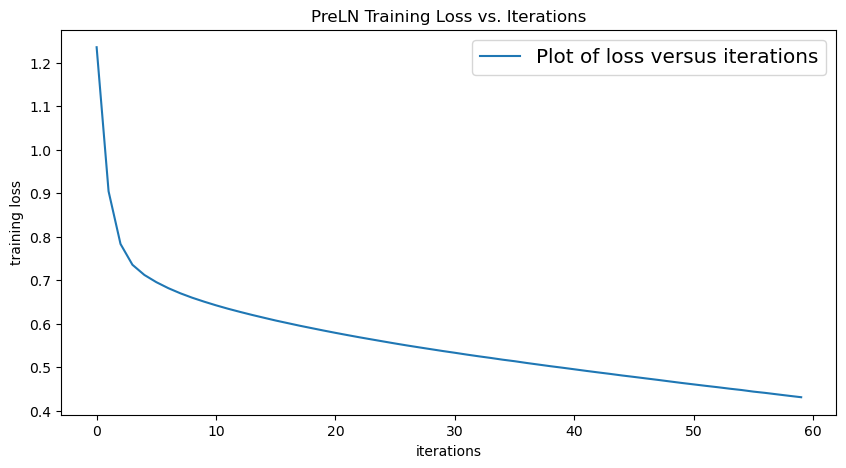

In [ ]:
# this code is borrowed from DLstudio

import random
import numpy
import torch
import os, sys

seed = 0           
random.seed(seed)
torch.manual_seed(seed)
torch.cuda.manual_seed(seed)
numpy.random.seed(seed)
torch.backends.cudnn.deterministic=True
torch.backends.cudnn.benchmarks=False
os.environ['PYTHONHASHSEED'] = str(seed)

dataroot = "./../data/DataForXformer/"


data_archive =  "en_es_xformer_8_10000.tar.gz"                 ##  for debugging only
# data_archive =  "en_es_xformer_8_90000.tar.gz"

max_seq_length = 10

embedding_size = 256               
#embedding_size = 128
#embedding_size = 64               

num_basic_encoders = num_basic_decoders = num_atten_heads = 4   
#num_basic_encoders = num_basic_decoders = num_atten_heads = 2  

masking = True                    ## For better results
#masking = False

dls = DLStudio(
                dataroot = dataroot,
                path_saved_model = {"encoder_PreLN" : "./saved_encoder_PreLN", 
                                    "decoder_PreLN" : "./saved_decoder_PreLN", 
                                    "embeddings_generator_en_PreLN" : "./saved_embeddings_generator_en_PreLN",
                                    "embeddings_generator_es_PreLN" : "./saved_embeddings_generator_es_PreLN",
                                   },
                learning_rate =  1e-5, 
                batch_size = 50,
                use_gpu = True,
                epochs = 60,
      )

xformer = TransformerPreLN( 
                            dl_studio = dls,
                            dataroot = dataroot,
                            save_checkpoints = True,
                            data_archive = data_archive,
                            max_seq_length = max_seq_length,
                            embedding_size = embedding_size,
          )

master_encoder = TransformerPreLN.MasterEncoder(
                                  dls,
                                  xformer,
                                  num_basic_encoders = num_basic_encoders,
                                  num_atten_heads = num_atten_heads,
                 )    


master_decoder = TransformerPreLN.MasterDecoderWithMasking(
                                  dls,
                                  xformer, 
                                  num_basic_decoders = num_basic_decoders,
                                  num_atten_heads = num_atten_heads,
                                  masking = masking,
                 )


number_of_learnable_params_in_encoder = sum(p.numel() for p in master_encoder.parameters() if p.requires_grad)
print("\n\nThe number of learnable parameters in the Master Encoder: %d" % number_of_learnable_params_in_encoder)

number_of_learnable_params_in_decoder = sum(p.numel() for p in master_decoder.parameters() if p.requires_grad)
print("\n\nThe number of learnable parameters in the Master Decoder: %d" % number_of_learnable_params_in_decoder)

if masking:
    xformer.run_code_for_training_TransformerPreLN(dls,master_encoder,master_decoder,display_train_loss=True,
                                                                        checkpoints_dir="checkpoints_with_masking_PreLN")
else:
    xformer.run_code_for_training_TransformerPreLN(dls,master_encoder,master_decoder,display_train_loss=True,
                                                                        checkpoints_dir="checkpoints_no_masking_PreLN")

#import pymsgbox
#response = pymsgbox.confirm("Finished training.  Start evaluation?")
#if response == "OK": 

xformer.run_code_for_evaluating_TransformerPreLN(master_encoder, master_decoder)



# 2 5 Outputs

### 2.1 FG
The input sentence pair: ['SOS sri lanka is a beautiful island EOS']    ['SOS sri lanka es una hermosa isla EOS']
The translation produced by TransformerFG:  EOS sri lanka es una hermosa isla EOS EOS EOS


The input sentence pair: ['SOS do you travel a lot EOS']    ['SOS viajáis mucho EOS']
The translation produced by TransformerFG:  EOS viajáis mucho EOS EOS EOS EOS EOS EOS EOS


The input sentence pair: ['SOS i forgot i owed you money EOS']    ['SOS olvidé que te debía dinero EOS']
The translation produced by TransformerFG:  EOS se te te debía debía EOS EOS EOS EOS


The input sentence pair: ['SOS i guess it is true EOS']    ['SOS supongo que es verdad EOS']
The translation produced by TransformerFG:  EOS supongo que es verdad EOS EOS EOS EOS EOS


The input sentence pair: ['SOS i meet a lot of people EOS']    ['SOS conozco a mucha gente EOS']
The translation produced by TransformerFG:  EOS conozco a mucha gente EOS EOS EOS EOS EOS



### 2.2 PreLN
The input sentence pair: ['SOS there was silence for a moment EOS']    ['SOS hubo silencio por un momento EOS']
The translation produced by TransformerPreLN:  SOS había EOS EOS EOS EOS EOS EOS EOS EOS


The input sentence pair: ['SOS tom ducked for cover EOS']    ['SOS tom se puso a cubierto EOS']
The translation produced by TransformerPreLN:  SOS tom EOS EOS EOS EOS EOS EOS EOS EOS


The input sentence pair: ['SOS i would like to speak with you alone EOS']    ['SOS me gustaría hablar a solas contigo EOS']
The translation produced by TransformerPreLN:  SOS me EOS EOS EOS EOS EOS EOS EOS EOS


The input sentence pair: ['SOS the children played outside until dark EOS']    ['SOS los niños jugaron afuera hasta que se oscureció EOS']
The translation produced by TransformerPreLN:  SOS el EOS EOS EOS EOS EOS EOS EOS EOS


The input sentence pair: ['SOS he is liked by everybody EOS']    ['SOS él es querido por todos EOS']
The translation produced by TransformerPreLN:  SOS él EOS EOS EOS EOS EOS EOS EOS EOS


### 2.3 Observation
The reason PreLN doesn't perform as well as FG is due to the additional normalization layer, which causes it to take longer to converge. In the original setup, we trained for 60 epochs, which likely wasn't sufficient. Next time, we should try increasing the number of epochs to 100.

# 3 Stop word removal

In [ ]:
def stop_word_removal(path_to_file):
    with open(path_to_file, 'r') as f:
        lines = f.readlines()
    # print(lines)
    # remove EOS & SOS is the lines
    lines = [line.replace(' EOS', '') for line in lines]
    lines = [line.replace('SOS ', '') for line in lines]
    print(lines)

    with open(path_to_file, 'w') as f:
        f.writelines(lines)
    

path_to_FG = "translations_with_FG_40.txt"
path_to_PreLN = "translations_with_PreLN_60.txt"
stop_word_removal(path_to_FG)
stop_word_removal(path_to_PreLN)

['\n', '\n', '\n', "The input sentence pair: ['sri lanka is a beautiful island']    ['sri lanka es una hermosa isla']\n", 'The translation produced by TransformerFG:  sri lanka es una hermosa isla\n', '\n', '\n', "The input sentence pair: ['do you travel a lot']    ['viajáis mucho']\n", 'The translation produced by TransformerFG:  viajáis mucho\n', '\n', '\n', "The input sentence pair: ['i forgot i owed you money']    ['olvidé que te debía dinero']\n", 'The translation produced by TransformerFG:  se te te debía debía\n', '\n', '\n', "The input sentence pair: ['i guess it is true']    ['supongo que es verdad']\n", 'The translation produced by TransformerFG:  supongo que es verdad\n', '\n', '\n', "The input sentence pair: ['i meet a lot of people']    ['conozco a mucha gente']\n", 'The translation produced by TransformerFG:  conozco a mucha gente\n', '\n', '\n', "The input sentence pair: ['i can ride a horse']    ['puedo montar un caballo']\n", 'The translation produced by TransformerFG:

# 4 Levenshtein metrics 2x5 table

In [39]:
def sort_txt_file(path_to_file):

    # sort the txt file into GT output pair
    with open(path_to_file, 'r') as f:
            input_data = f.readlines()

    output = ""
    for i in range(len(input_data)):
        save = 0
        
        # remove leading/trailing whitespace
        line = input_data[i].strip() 

        if line.startswith("The input sentence pair"):
            # split the line into parts by using the delimiter "['"
            parts = line.split("['")
            # print(parts)
            GoundT = parts[2].split("']")[0] # get the first part of the string
            # print(GT)
        elif line.startswith("The translation produced by"):
            parts = line.split(":")
            # print(parts)
            pred = parts[1].strip()
            # print(pred)
            save = 1

        if save == 1:
            output += GoundT + "\n" + pred + "\n"
            save = 0

    # remove the last empty line
    if output.endswith("\n"):
        output = output[:-1]
        
    return output



FG_output = sort_txt_file(path_to_FG)
with open("FG_output.txt", "w") as f:
        f.write(FG_output)
        
Pre_output = sort_txt_file(path_to_PreLN)
with open("Pre_output.txt", "w") as f:
        f.write(Pre_output)

In [44]:
import numpy as np

def levenshtein_distance(str1, str2):
    # Ensure str1 is the longer string
    if len(str1) < len(str2):
        str1, str2 = str2, str1

    len_str1, len_str2 = len(str1), len(str2)

    # Initialize two rows for dynamic programming
    previous_row = list(range(len_str2 + 1))
    current_row = [0] * (len_str2 + 1)

    for i in range(1, len_str1 + 1):
        current_row[0] = i
        for j in range(1, len_str2 + 1):
            cost = 0 if str1[i - 1] == str2[j - 1] else 1
            current_row[j] = min(
                previous_row[j] + 1,      # Deletion
                current_row[j - 1] + 1,   # Insertion
                previous_row[j - 1] + cost  # Substitution
            )
        previous_row, current_row = current_row, previous_row

    return previous_row[-1]




def report_statistics(distances):
    print(f"Mean: {np.mean(distances):.2f}")
    print(f"Median: {np.median(distances):.2f}")
    print(f"Standard Deviation: {np.std(distances):.2f}")
    print(f"Maximum: {np.max(distances):.2f}")
    print(f"Minimum: {np.min(distances):.2f}")



### 4.1 FG

In [45]:
with open("FG_output.txt", "r") as f:
        FG_lines =f.readlines()
FG_distance = []
for i in range(0, len(FG_lines), 2):
    FG_distance.append(levenshtein_distance(FG_lines[i], FG_lines[i+1]))

print("TransformerFG Statistics:")
report_statistics(FG_distance)

TransformerFG Statistics:
Mean: 2.10
Median: 0.00
Standard Deviation: 3.39
Maximum: 13.00
Minimum: 0.00


### 4.2 PreLN

In [46]:
with open("Pre_output.txt", "r") as f:
        Pre_lines =f.readlines()
Pre_distance = []
for i in range(0, len(Pre_lines), 2):
    Pre_distance.append(levenshtein_distance(Pre_lines[i], Pre_lines[i+1]))

print("TransformerPreLN Statistics:")
report_statistics(Pre_distance)


TransformerPreLN Statistics:
Mean: 27.35
Median: 26.50
Standard Deviation: 8.11
Maximum: 46.00
Minimum: 12.00
